### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [4]:
min_qubits=2
max_qubits=10
max_circuits=1
num_shots=10000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                   "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator
# backend_id="aqt_qasm_simulator"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }


In [5]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1 - Fidelity of Ansatz

Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Aug 29, 2023 15:21:48 UTC
************
Executing [1] circuits for num_qubits = 2
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Executing [1] circuits for num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.25
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.022, 0.512, 0.015 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 0.999

************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.209
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 14, 

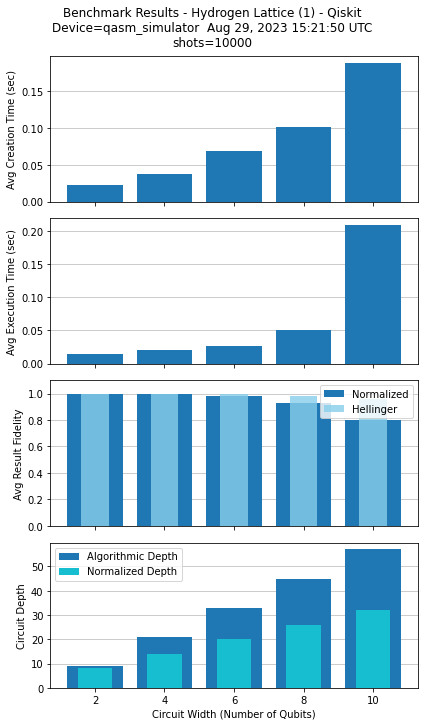

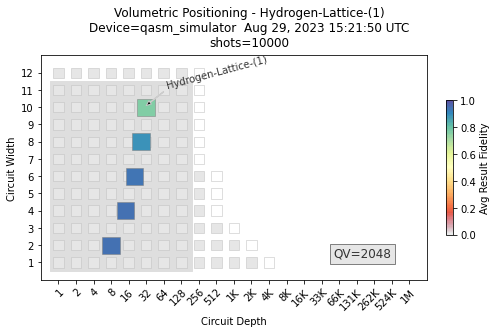

In [6]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark
hydrogen_lattice_benchmark.verbose=False
import execute
#execute.set_noise_model(None)
execute.max_jobs_active=1

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, parameterized=False,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hydrogen Lattice - Method 2 - Energy as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
Validating user inputs...
... execution starting at Aug 29, 2023 08:01:12 UTC
************
Executing [1] restarts for num_qubits = 10

...................
Classically Computed Energies from solution file h010_chain_000_75.sol for 10 qubits and radius 0.75
  DOCI calculated energy : -5.10112523043154
  FCI calculated energy : -5.180667158366846
  Random Solution calculated energy : 3.8172742304437923
Computed Energies for 10 qubits and radius 0.75
  Lowest Energy : -4.572256419946163
  Solution Quality : 0.9626609806585589, Accuracy Ratio : 0.9323833405741817
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 57, 0.195
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 32, 0.37, 50.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.082, 0.673, 0.48 secs
Average Transpiling, Validating, Running Times for group 10 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized

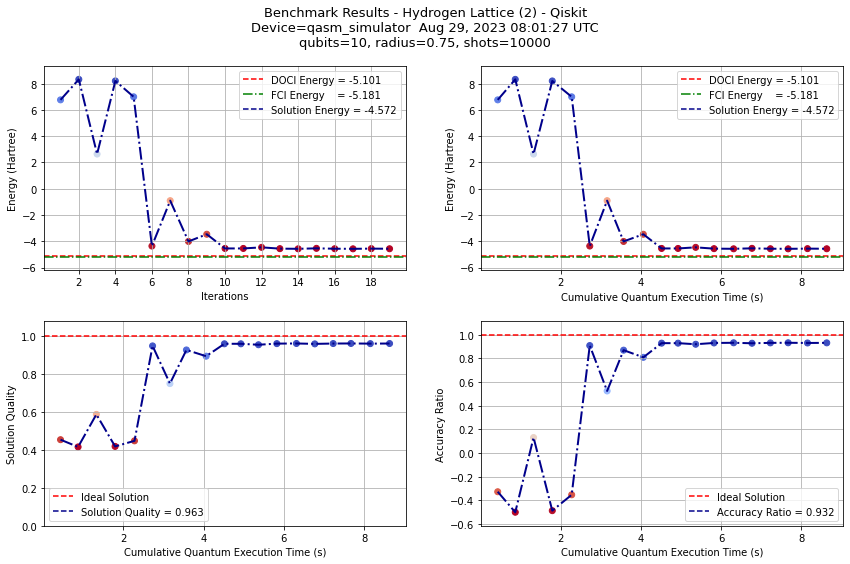

----- Cumulative Plots for all qubit groups -----


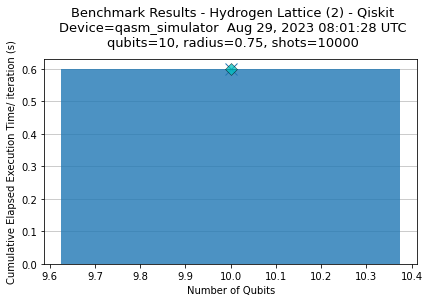

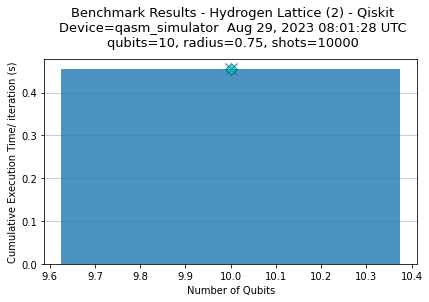

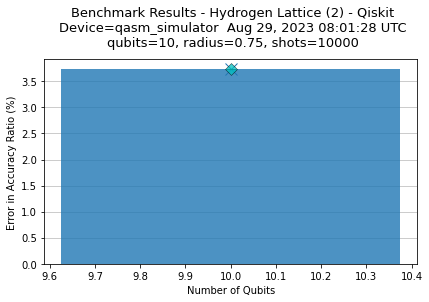

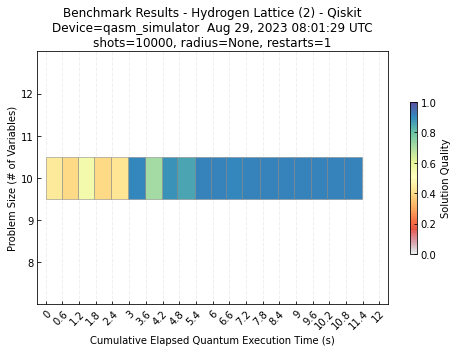

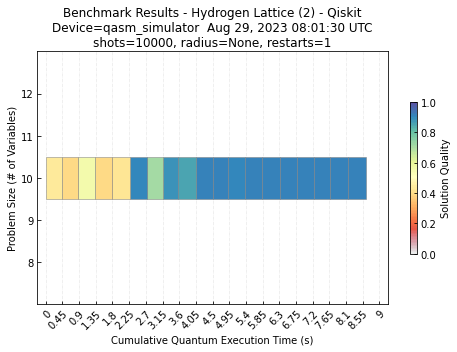

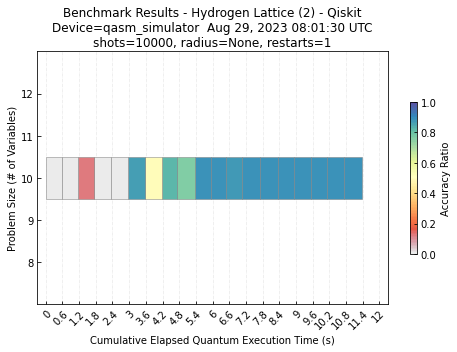

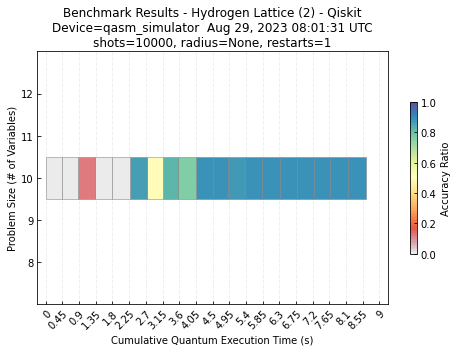

In [4]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

hydrogen_lattice_benchmark.verbose = False
import execute
execute.verbose = False

# execute and display options
score_metric=['solution_quality', 'accuracy_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time']

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False, max_iter=30,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Aug 29, 2023 04:44:45 UTC
Loading from width_8_instance_1.json, corresponding to 8 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 45, 0.194
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 26, 0.348, 32.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.07, 0.167, 0.04 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.0, 0.0

Loading from width_2_instance_1.json, corresponding to 2 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.01, 0.044, 0.009 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.00

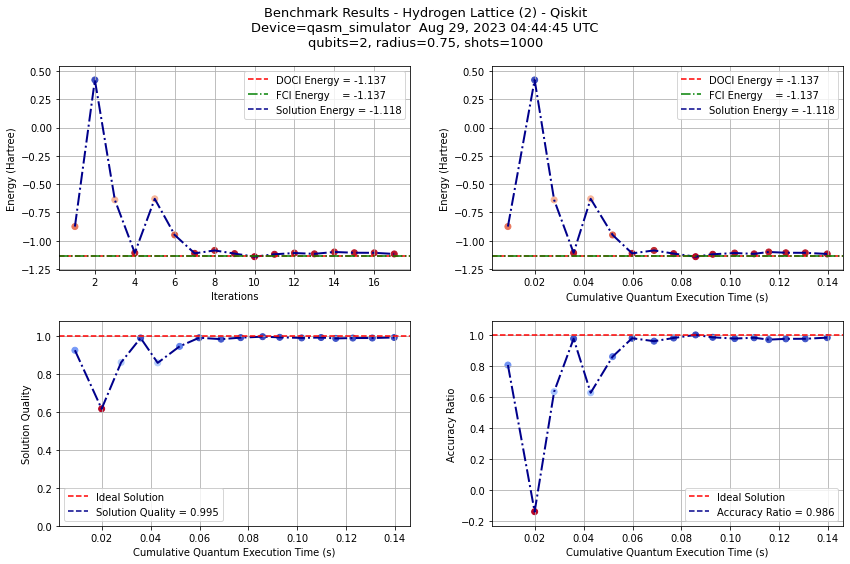

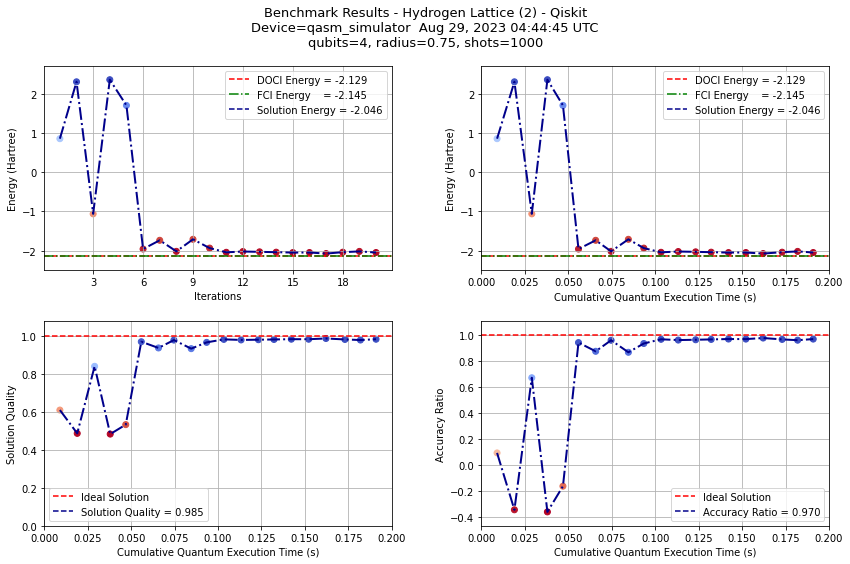

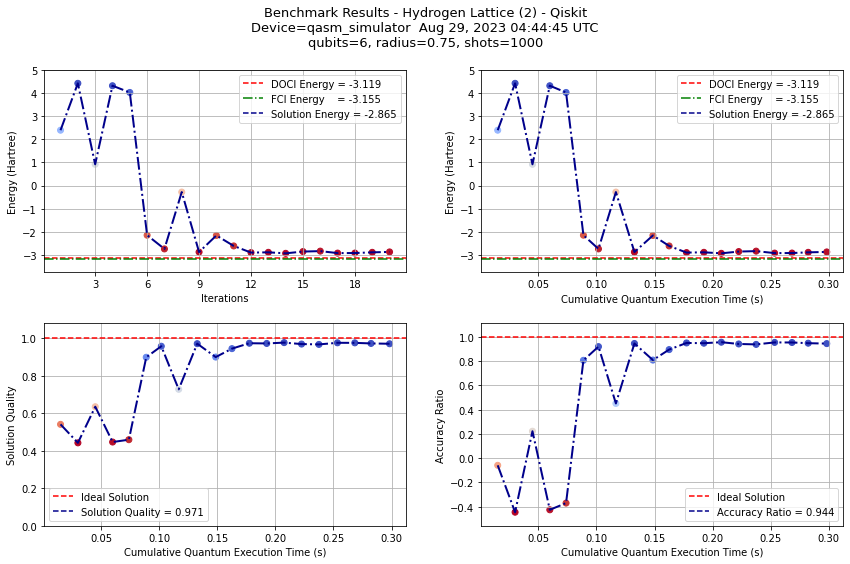

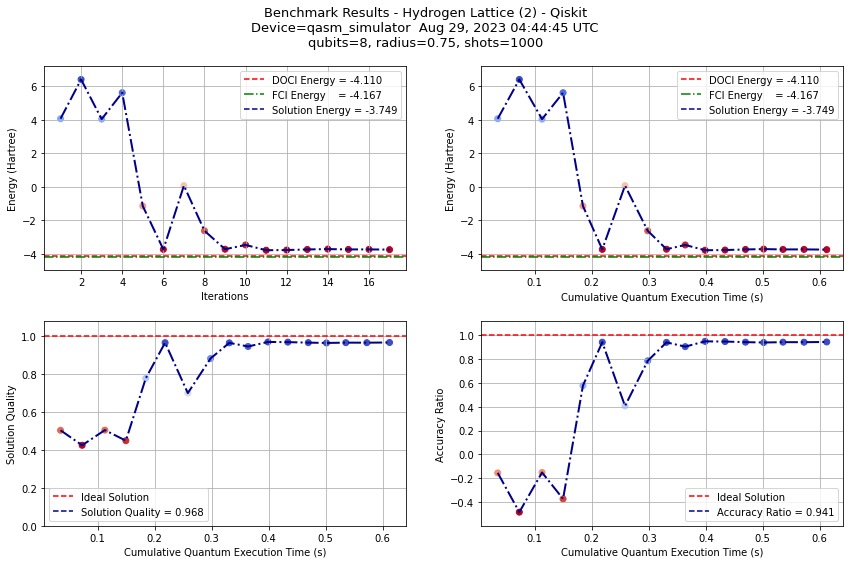

----- Cumulative Plots for all qubit groups -----


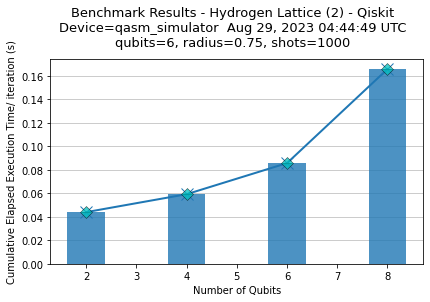

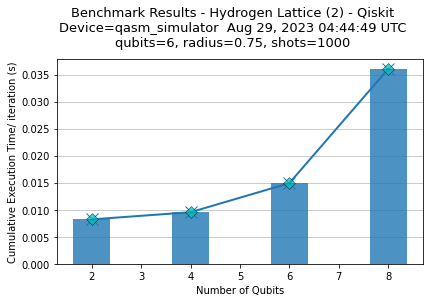

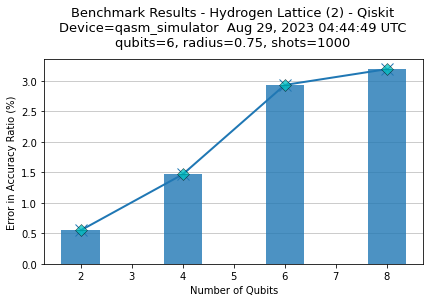

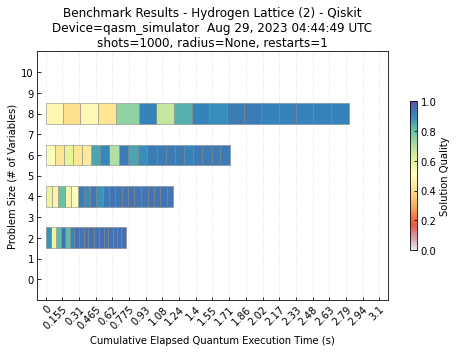

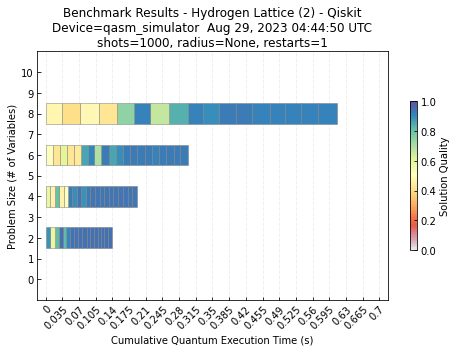

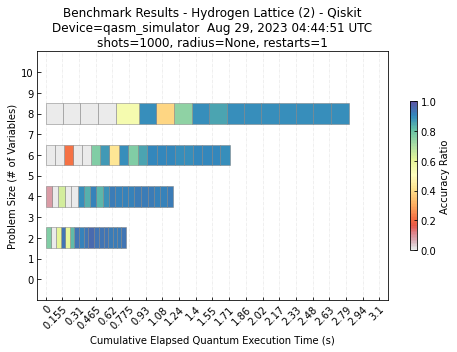

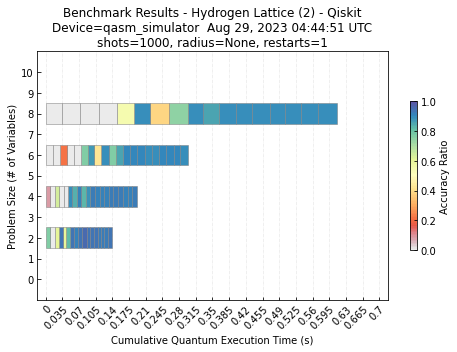

In [5]:
import os, hydrogen_lattice_benchmark

#backend_id="qasm_simulator"

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''),                                             
                score_metric=['solution_quality', 'accuracy_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time'],
                individual=False)